# <font color='red'>Clustering Assignment</font>

In [ ]:
 from IPython.display import IFrame, YouTubeVideo
YouTubeVideo(id='BPM&t=1s', width=600)

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>

4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$
where N= number of clusters
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes)
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [ ]:
!pip install networkx==2.3

In [ ]:
!pip install stellargraph

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movie_actor_network.csv to movie_actor_network.csv


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [ ]:
data.head()

,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3


In [ ]:
edges = [tuple(x) for x in data.values.tolist()]

In [ ]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

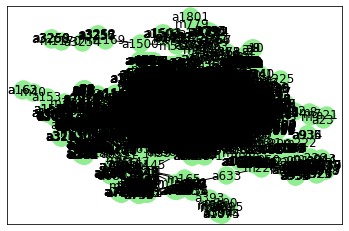

In [ ]:
nx.draw_networkx(B,node_color='lightgreen')

In [ ]:
A = list(nx.connected_component_subgraphs(B))[0]

In [ ]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


pos : dictionary, optional

A dictionary with nodes as keys and positions as values. If not specified a spring layout positioning will be computed. See networkx.layout for functions that compute node positions.

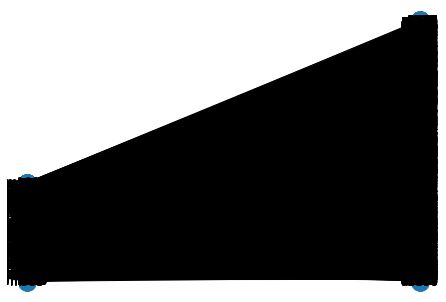

In [ ]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [ ]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [ ]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [ ]:
#model.wv.vectors

In [ ]:
#print(model.wv.vectors[0].tolist())

In [ ]:
print(A.node['a973'])
print(A.node['a973']['label'])

{'bipartite': 1, 'label': 'actor'}
actor


In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

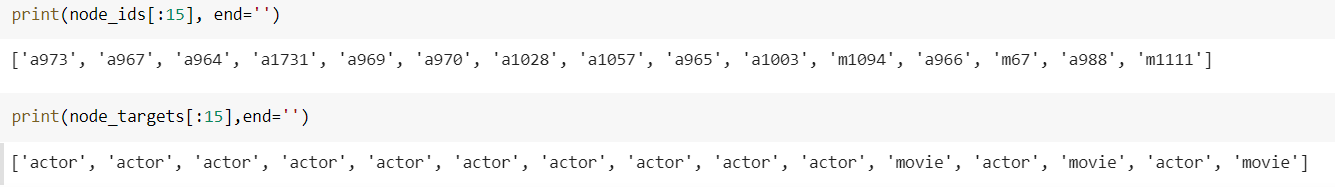

In [ ]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    for index in range(len(node_ids)):
        if 'a' in node_ids[index]:
            actor_embeddings.append(node_embeddings[index].tolist())
            actor_nodes.append(node_ids[index])
        else:
            movie_embeddings.append(node_embeddings[index].tolist())
            movie_nodes.append(node_ids[index])
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [ ]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

In [ ]:
len(actor_nodes)

3411

In [ ]:
len(actor_embeddings)

3411

<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [ ]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [ ]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    # Getting the largest connected_component and taking its length which means the number of nodes that it contains
    numerator = len(max(nx.connected_components(graph),key=len))

    # Getting the number of nodes that the earlier graph contains
    denominator = graph.number_of_nodes()

    # Calculating cost1
    S = numerator/denominator
    cost1 = S/number_of_clusters

    return cost1

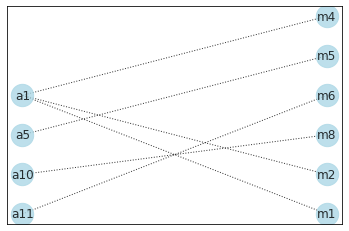

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [ ]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters

In [ ]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    # List of actor nodes
    actor_nodes = []

    # List of movie nodes
    movie_nodes = []

    # Get all nodes
    all_nodes = list(graph.nodes())
    for node in all_nodes:
        if 'a' in node:
            actor_nodes.append(node)
        if 'm' in node:
            movie_nodes.append(node)

    # Calculate the numerator
    numerator = sum([graph.degree(k) for k in actor_nodes])

    # Calculate the denominator
    denominator = len(set(movie_nodes)) # set gives us only unique movie nodes from movie_nodes list

    # calculate cost2
    cost2 = (1/number_of_clusters)*(numerator/denominator)

    return cost2

<font color='cyan'>Grader function - 4</font>

In [ ]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [ ]:
from sklearn.cluster import KMeans
from tqdm import tqdm
# Store the cost = cost1*cost2 values of clusters in a list
Cost = []
list_num_of_clusters = [3,5,10,30,50,100,200,500]
for number_of_clusters in tqdm(list_num_of_clusters):
    # Create a list to store all clusters
    list_of_clusters = []

    # Clustering algorithm
    algo = KMeans(n_clusters=number_of_clusters)

    # We need to pass a matrix of size N*d gotten from gensim(the dense vector of actor nodes)
    algo.fit(actor_embeddings)
    # Get the labels for corresponding actor nodes
    labels = algo.labels_

    # Consider unique cluster numbers in a list
    unique = np.unique(labels).tolist()

    # Create a dict of (actor_id,cluster number) pairs
    dict_of_actor_nodes = dict(zip(actor_nodes,labels.tolist()))

    # Go through each cluster number
    for num in unique:
        # Create a list which contains all nodes of one cluster
        Cluster = []
        for node,cluster_number in dict_of_actor_nodes.items():
            if cluster_number == num:
                Cluster.append(node)
        list_of_clusters.append(Cluster)
    # Consider Cost1 and Cost2
    Cost1 = 0
    Cost2 = 0

    # Consider each cluster from the list of all clusters
    for cluster in list_of_clusters:
        # Create an empty graph
        G = nx.Graph()
        # Now consider each node from the list "cluster"
        for actor_node in cluster:
            ego_graph_object = nx.ego_graph(B,actor_node)
            G.add_nodes_from(ego_graph_object.nodes())
            G.add_edges_from(ego_graph_object.edges())
        Cost1 += cost1(G,number_of_clusters)
        Cost2 += cost2(G,number_of_clusters)
    cost = Cost1*Cost2
    Cost.append(cost)
print("\n")
# Get the index of the max value in Cost
max_value = max(Cost)
max_index = Cost.index(max_value)

# Get number_of_clusters which have maximum Cost
optimal_cluster = list_num_of_clusters[max_index]

# Printing results
print(" The of max value gotten from cost1*cost2 is : {}".format(max_index))
print(" The number of clusters which have max cost1*cost2 are : {}".format(optimal_cluster))


100%|██████████| 8/8 [00:49<00:00,  6.14s/it]



 The of max value gotten from cost1*cost2 is : 0
 The number of clusters which have max cost1*cost2 are : 3


In [ ]:
clustering = KMeans(n_clusters=optimal_cluster)
clustering.fit(actor_embeddings)
Labels = clustering.labels_.tolist()

<font color='blue'>Displaying similar actor clusters</font>

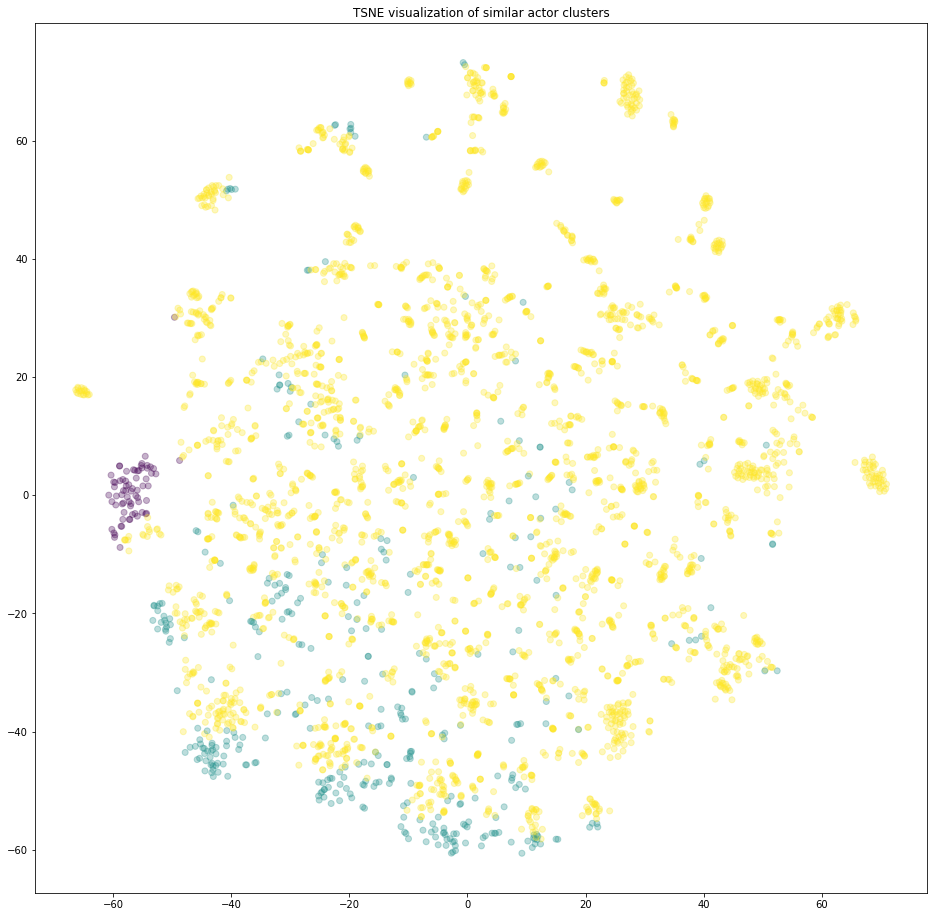

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_embeddings)

# draw the points

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0],
            node_embeddings_2d[:,1],
            c=Labels, alpha=0.3)
plt.title('{} visualization of similar actor clusters'.format(transform.__name__))

plt.show()

<font color='blue'>Grouping similar movies</font>

In [ ]:
# Store the cost = cost1*cost2 values of clusters in a list
Cost = []
list_num_of_clusters = [3,5,10,30,50,100,200,500]
for number_of_clusters in tqdm(list_num_of_clusters):
    # Create a list to store all clusters
    list_of_clusters = []

    # Clustering algorithm
    algo = KMeans(n_clusters=number_of_clusters)

    # We need to pass a matrix of size N*d gotten from gensim(the dense vector of movie nodes)
    algo.fit(movie_embeddings)
    # Get the labels for corresponding movie nodes
    labels = algo.labels_

    # Consider unique cluster numbers in a list
    unique = np.unique(labels).tolist()

    # Create a dict of (movie_id,cluster number) pairs
    dict_of_movie_nodes = dict(zip(movie_nodes,labels.tolist()))

    # Go through each cluster number
    for num in unique:
        # Create a list which contains all nodes of one cluster
        Cluster = []
        for node,cluster_number in dict_of_movie_nodes.items():
            if cluster_number == num:
                Cluster.append(node)
        list_of_clusters.append(Cluster)
    # Consider Cost1 and Cost2
    Cost1 = 0
    Cost2 = 0

    # Consider each cluster from the list of all clusters
    for cluster in list_of_clusters:
        # Create an empty graph
        G = nx.Graph()
        # Now consider each node from the list "cluster"
        for movie_node in cluster:
            ego_graph_object = nx.ego_graph(B,movie_node)
            G.add_nodes_from(ego_graph_object.nodes())
            G.add_edges_from(ego_graph_object.edges())
        Cost1 += cost1(G,number_of_clusters)
        Cost2 += cost2(G,number_of_clusters)
    cost = Cost1*Cost2
    Cost.append(cost)
print("\n")
# Get the index of the max value in Cost
max_value = max(Cost)
max_index = Cost.index(max_value)

# Get number_of_clusters which have maximum Cost
optimal_cluster = list_num_of_clusters[max_index]

# Printing results
print(" The of max value gotten from cost1*cost2 is : {}".format(max_index))
print(" The number of clusters which have max cost1*cost2 are : {}".format(optimal_cluster))


100%|██████████| 8/8 [00:23<00:00,  2.90s/it]



 The of max value gotten from cost1*cost2 is : 4
 The number of clusters which have max cost1*cost2 are : 50


In [ ]:
clustering = KMeans(n_clusters=optimal_cluster)
clustering.fit(movie_embeddings)
Labels = clustering.labels_.tolist()

<font color='blue'>Displaying similar movie clusters</font>

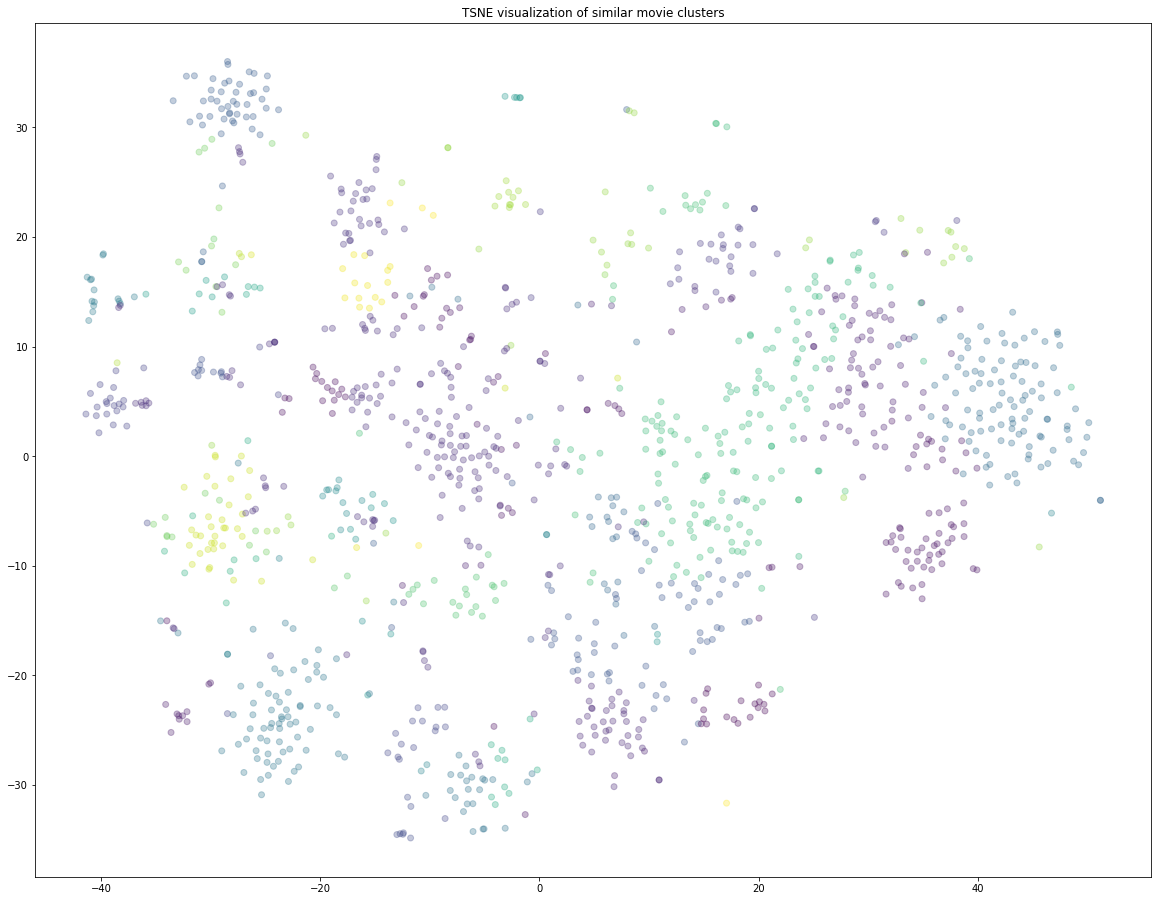

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(movie_embeddings)

# draw the points

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0],
            node_embeddings_2d[:,1],
            c=Labels, alpha=0.3)
plt.title('{} visualization of similar movie clusters'.format(transform.__name__))

plt.show()